In [9]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import json

# Referring expressions and their regions

In [2]:
p1 = "../data/refcoco_refdf.json.gz"

In [3]:
refdf = pd.read_json(p1,compression='gzip', orient='split')
refdf.head()

,i_corpus,image_id,region_id,r_corpus,rex_id,refexp,tagged
0,1,581857,1719310,refcoco,0,the lady with the blue shirt,"[[the, DT], [lady, NN], [with, IN], [the, DT],..."
1,1,581857,1719310,refcoco,1,lady with back to us,"[[lady, NN], [with, IN], [back, NN], [to, TO],..."
2,1,581857,1719310,refcoco,2,blue shirt,"[[blue, JJ], [shirt, NN]]"
3,1,581857,463958,refcoco,3,woman in gray shirt facing camera on right,"[[woman, NN], [in, IN], [gray, JJ], [shirt, NN..."
4,1,581857,463958,refcoco,4,woman gray right,"[[woman, NN], [gray, NN], [right, NN]]"


In [5]:
depdf = pd.read_json("../data/refcoco_depdf.json.gz",compression='gzip', orient='split')
depdf.head()

,image_id,region_id,depparse_stnf
0,581857,1719310,(ROOT\n (NP\n (NP (DT the) (NN lady))\n ...
1,581857,1719310,(ROOT\n (FRAG\n (NP (NN lady))\n (PP (I...
2,581857,1719310,(ROOT\n (NP (JJ blue) (NN shirt)))
3,581857,463958,(ROOT\n (FRAG\n (NP (NN woman))\n (PP (...
4,581857,463958,(ROOT\n (NP\n (NP (NN woman))\n (NP (JJ...


In [21]:
print(depdf.iloc[3]['depparse_stnf'])

(ROOT
  (FRAG
    (NP (NN woman))
    (PP (IN in)
      (NP
        (NP (JJ gray) (NN shirt))
        (VP (VBG facing)
          (NP (NN camera))
          (PP (IN on)
            (NP (NN right))))))))


In [6]:
fdf = pd.read_json("../data/flickr30k_ref_anno.json.gz",compression='gzip', orient='split')
fdf.head()

,cat,i_corpus,image_id,r_corpus,refexp,region_id,sent_id,rex_id,tagged_stnf,wn_anno_stnf,attr_name_stnf
0,people,1,3631986552,flickr,"[the, surfer]",132816,0,0,"[[the, DT], [surfer, NN]]","[[None, None], [surfer.n.01, noun.person]]","[[surfer, NAME]]"
1,scene,1,3631986552,flickr,"[a, big, wave]",132817,0,1,"[[a, DT], [big, JJ], [wave, NN]]","[[None, None], [large.a.01, adj.all], [wave.n....","[[big, SIZE], [wave, NAME]]"
2,other,1,3631986552,flickr,"[his, board]",132821,0,2,"[[his, PRP$], [board, NN]]","[[None, None], [board.n.01, noun.group]]","[[board, NAME]]"
3,people,1,3631986552,flickr,"[a, surfer]",132816,1,3,"[[a, DT], [surfer, NN]]","[[None, None], [surfer.n.01, noun.person]]","[[surfer, NAME]]"
4,scene,1,3631986552,flickr,"[a, big, wave]",132817,1,4,"[[a, DT], [big, JJ], [wave, NN]]","[[None, None], [large.a.01, adj.all], [wave.n....","[[big, SIZE], [wave, NAME]]"


In [10]:
with open("/Volumes/data/Corpora/External/ImageCorpora/MSCOCO/annotations/instances_val2014.json", 'r') as f:
    coco_in = json.load(f)

In [12]:
cocoandf = pd.DataFrame(coco_in['annotations'])


In [13]:
cocoandf.head()

,area,bbox,category_id,id,image_id,iscrowd,segmentation
0,2765.14865,"[199.84, 200.46, 77.71, 70.88]",58,156,558840,0,"[[239.97, 260.24, 222.04, 270.49, 199.84, 253...."
1,1545.42130,"[234.22, 317.11, 149.39, 38.55]",58,509,200365,0,"[[247.71, 354.7, 253.49, 346.99, 276.63, 337.3..."
2,5607.66135,"[239.48, 347.87, 160.0, 57.81]",58,603,200365,0,"[[274.58, 405.68, 298.32, 405.68, 302.45, 402...."
3,0.00000,"[296.65, 388.33, 1.03, 0.0]",58,918,200365,0,"[[296.65, 388.33, 296.65, 388.33, 297.68, 388...."
4,800.41325,"[251.87, 333.42, 125.94, 22.71]",58,1072,200365,0,"[[251.87, 356.13, 260.13, 343.74, 300.39, 335...."


In [14]:
coco_in['categories']

[{'id': 1, 'name': 'person', 'supercategory': 'person'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'vehicle'},
 {'id': 3, 'name': 'car', 'supercategory': 'vehicle'},
 {'id': 4, 'name': 'motorcycle', 'supercategory': 'vehicle'},
 {'id': 5, 'name': 'airplane', 'supercategory': 'vehicle'},
 {'id': 6, 'name': 'bus', 'supercategory': 'vehicle'},
 {'id': 7, 'name': 'train', 'supercategory': 'vehicle'},
 {'id': 8, 'name': 'truck', 'supercategory': 'vehicle'},
 {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'},
 {'id': 10, 'name': 'traffic light', 'supercategory': 'outdoor'},
 {'id': 11, 'name': 'fire hydrant', 'supercategory': 'outdoor'},
 {'id': 13, 'name': 'stop sign', 'supercategory': 'outdoor'},
 {'id': 14, 'name': 'parking meter', 'supercategory': 'outdoor'},
 {'id': 15, 'name': 'bench', 'supercategory': 'outdoor'},
 {'id': 16, 'name': 'bird', 'supercategory': 'animal'},
 {'id': 17, 'name': 'cat', 'supercategory': 'animal'},
 {'id': 18, 'name': 'dog', 'supercategory': 'animal'},

In [23]:
with open("../data/refcoco_refexp.txt.json", 'r') as f:
    reftxt = json.load(f)

In [24]:
reftxt.keys()

dict_keys(['docId', 'sentences'])

In [36]:
reftxt['sentences'][5]['basicDependencies']

[{'dep': 'ROOT',
  'dependent': 1,
  'dependentGloss': 'woman',
  'governor': 0,
  'governorGloss': 'ROOT'},
 {'dep': 'compound',
  'dependent': 2,
  'dependentGloss': 'greyshirt',
  'governor': 3,
  'governorGloss': 'right'},
 {'dep': 'dep',
  'dependent': 3,
  'dependentGloss': 'right',
  'governor': 1,
  'governorGloss': 'woman'}]

In [37]:
refdf.iloc[5]

i_corpus                                               1
image_id                                          581857
region_id                                         463958
r_corpus                                         refcoco
rex_id                                                 5
refexp                             woman greyshirt right
tagged       [[woman, NN], [greyshirt, NN], [right, NN]]
Name: 5, dtype: object

In [38]:
parses = pd.read_json("../data/refcoco_refexp.txt.json.gz", compression='gzip', orient='columns')

In [41]:
parses.iloc[0]['sentences']

{'basicDependencies': [{'dep': 'ROOT',
   'dependent': 2,
   'dependentGloss': 'lady',
   'governor': 0,
   'governorGloss': 'ROOT'},
  {'dep': 'det',
   'dependent': 1,
   'dependentGloss': 'the',
   'governor': 2,
   'governorGloss': 'lady'},
  {'dep': 'case',
   'dependent': 3,
   'dependentGloss': 'with',
   'governor': 6,
   'governorGloss': 'shirt'},
  {'dep': 'det',
   'dependent': 4,
   'dependentGloss': 'the',
   'governor': 6,
   'governorGloss': 'shirt'},
  {'dep': 'amod',
   'dependent': 5,
   'dependentGloss': 'blue',
   'governor': 6,
   'governorGloss': 'shirt'},
  {'dep': 'nmod',
   'dependent': 6,
   'dependentGloss': 'shirt',
   'governor': 2,
   'governorGloss': 'lady'}],
 'enhancedDependencies': [{'dep': 'ROOT',
   'dependent': 2,
   'dependentGloss': 'lady',
   'governor': 0,
   'governorGloss': 'ROOT'},
  {'dep': 'det',
   'dependent': 1,
   'dependentGloss': 'the',
   'governor': 2,
   'governorGloss': 'lady'},
  {'dep': 'case',
   'dependent': 3,
   'dependentGl

In [40]:
pd.DataFrame(parses['sentences']).head()

,sentences
0,"{'index': 0, 'line': 1, 'parse': '(ROOT (NP ..."
1,"{'index': 1, 'line': 2, 'parse': '(ROOT (FRA..."
2,"{'index': 2, 'line': 3, 'parse': '(ROOT (NP ..."
3,"{'index': 3, 'line': 4, 'parse': '(ROOT (FRA..."
4,"{'index': 4, 'line': 5, 'parse': '(ROOT (NP ..."


In [28]:
len(reftxt['sentences'])

142210

In [29]:
len(refdf)

142210

# Mscoco objects, bounding boxes and categories

In [11]:
p2 = "../data/mscoco_bbdf.json.gz"

In [12]:
bbdf = pd.read_json(p2,compression='gzip', orient='split')
bbdf.head()

,i_corpus,image_id,region_id,bb,cat
0,1,480023,86,"[116.95, 305.86, 285.3, 266.03]",58
1,1,480023,438029,"[75.23, 134.7, 203.17, 215.63]",1
2,1,480023,460329,"[239.33, 176.98, 110.56, 133.66]",1
3,1,480023,498741,"[394.95, 222.7, 85.05, 197.48]",1
4,1,480023,1200708,"[0.0, 0.18, 78.96, 164.01]",1


In [39]:
len(bbdf)

196771

In [40]:
#this dataframe should contain all regions in mscoco images
#(a superset of the regions in refcoco)

In [41]:
len(set(bbdf.region_id) - set(refdf.region_id))

146771

In [7]:
bbdf2 = pd.read_json("../data/flickr30k_bbdf.json.gz",compression='gzip', orient='split')
bbdf2.head()

,bb,i_corpus,i_height,i_width,image_id,r_corpus,region_id
0,"[381, 220, 466, 374]",1,375,500,3665421893,flickr,135205
1,"[381, 220, 466, 374]",1,375,500,3665421893,flickr,135209
2,"[113, 190, 207, 374]",1,375,500,3665421893,flickr,135205
3,"[113, 190, 207, 374]",1,375,500,3665421893,flickr,135209
4,"[13, 192, 106, 375]",1,375,500,3665421893,flickr,135205


# Show an image

In [13]:
MSCOCO_BASEDIR = "/Volumes/data/Corpora/External/ImageCorpora/MSCOCO/train2014"

In [14]:
def get_mscoco_img(image_id):
    p = os.path.join(MSCOCO_BASEDIR, 'COCO_train2014_%012d.jpg' % (image_id))
    img = plt.imread(p)
    return img

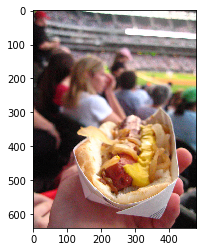

In [18]:
plt.imshow(get_mscoco_img(480023))

In [19]:
def plot_bb(image_id,bb):
    fig, ax = plt.subplots()
    fig.set_size_inches(5,10)
    ax.imshow(get_mscoco_img(image_id))
    ax.add_patch(matplotlib.patches.Rectangle(
                    (bb[0], bb[1]),
                    bb[2],
                    bb[3],
                    edgecolor='r',fill=False))

In [21]:
bb = bbdf[bbdf['image_id'] == 480023]['bb'].iloc[0]

In [22]:
bb

[116.95, 305.86, 285.3, 266.03]

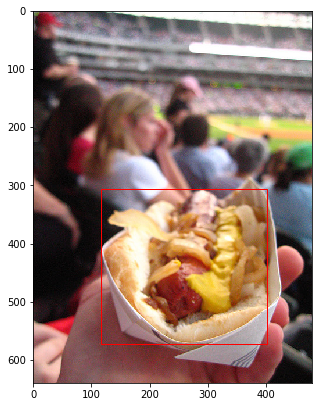

In [23]:
plot_bb(480023,bb)

# Annotating referring expressions

In [35]:
import annotate
import importlib
importlib.reload(annotate)

<module 'annotate' from '/Users/sina/generation/names_in_context/utils/annotate.py'>

In [36]:
def get_refanno(tagged_words):
    head_found = False
    ann_words = []
    for (word,tag) in tagged_words:
        if word in annotate.locations:
            ann_words.append((word,"LOC"))
        elif word in annotate.sizes:
            ann_words.append((word,"SIZE"))
        elif word in annotate.colors:
            ann_words.append((word,"COLOR"))
        elif word in annotate.relations:
            # TODO: do something more clever here
            # following words will be attribute/name of a distractor object
            ann_words.append((word,"REL"))
        elif not head_found and tag in ['NN','NNS']:
            ann_words.append((word,"NAME"))
            head_found = True
    return ann_words
            
            

In [37]:
refdf['anno'] = refdf['tagged'].apply(lambda x: get_refanno(x))

In [38]:
refdf.head()

,i_corpus,image_id,region_id,r_corpus,rex_id,refexp,tagged,anno
0,1,581857,1719310,refcoco,0,the lady with the blue shirt,"[[the, DT], [lady, NN], [with, IN], [the, DT],...","[(lady, NAME), (with, REL), (blue, COLOR)]"
1,1,581857,1719310,refcoco,1,lady with back to us,"[[lady, NN], [with, IN], [back, NN], [to, TO],...","[(lady, NAME), (with, REL)]"
2,1,581857,1719310,refcoco,2,blue shirt,"[[blue, JJ], [shirt, NN]]","[(blue, COLOR), (shirt, NAME)]"
3,1,581857,463958,refcoco,3,woman in gray shirt facing camera on right,"[[woman, NN], [in, IN], [gray, JJ], [shirt, NN...","[(woman, NAME), (gray, COLOR), (right, LOC)]"
4,1,581857,463958,refcoco,4,woman gray right,"[[woman, NN], [gray, NN], [right, NN]]","[(woman, NAME), (gray, COLOR), (right, LOC)]"
